#### Oppgave 1

### a)

In [105]:
import xarray as xr
from scipy.interpolate import RectBivariateSpline
import numpy as np
from matplotlib import pyplot as plt
from time import time
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import random


In [106]:
def f(x,t,epsilon, w):
    """""
    function calculates function f used in velocity equation.
    :param x: array
    :param t: array
    :param epsilon: float
    :param w: float
    return array
    """""
    return epsilon*np.sin(w*t)*x**2 + (1-2*epsilon*np.sin(w*t))*x
def del_f(x,t,epsilon, w):
    """""
    function calculates function f used in velocity equation.
    :param x: array
    :param t: array
    :param epsilon: float
    :param w: float
    return array
    """""
    return epsilon*np.sin(w*t)*2*x + (1-2*epsilon*np.sin(w*t))

def velocity_x(x: np.ndarray, y: np.ndarray, t: np.ndarray , A: float, epsilon: float, w: float):
    """""
    function calculates velocity in x direction.
    :param x: array
    :param y: array
    :param t: array
    :param A: float
    :param epsilon: float
    :param w: float
    return array
    """""
    return -np.pi*A*np.sin(np.pi*f(x,t, epsilon, w))*np.cos(np.pi*y)
def velocity_y(x: np.ndarray, y: np.ndarray, t: np.ndarray , A: float, epsilon: float, w: float):
    """""
    function calculates velocity in y direction.
    :param x: array
    :param y: array
    :param t: array
    :param A: float
    :param epsilon: float
    :param w: float
    return array
    """""
    return np.pi*A*np.cos(np.pi*f(x,t, epsilon, w))*np.sin(np.pi*y)*del_f(x,t, epsilon, w)
def Heun(init_pos: tuple, t_end: int, h: float, A: float, epsilon: float, w: float):
    new_x = np.array([init_pos[0]])
    new_y = np.array([init_pos[1]])
    t = 0
    i = 0
    while t < t_end:

        k_1_x = velocity_x(new_x[i], new_y[i], i, A, epsilon, w)
        k_1_y = velocity_y(new_x[i], new_y[i], i, A, epsilon, w)

        k_2_x = velocity_x(new_x[i]+k_1_x*h,new_y[i]+k_1_y*h, i+h, A, epsilon, w)
        k_2_y = velocity_y(new_x[i]+k_1_x*h,new_y[i]+k_1_y*h, i+h, A, epsilon, w)

        new_x = np.append(new_x, new_x[i]+ (h/2)*(k_1_x + k_2_x))
        new_y = np.append(new_y, new_y[i]+ (h/2)*(k_1_y + k_2_y))
        t += h
        i += 1
    x = np.hstack((new_x.reshape(-1, 1), new_y.reshape(-1, 1)))

    
    return x

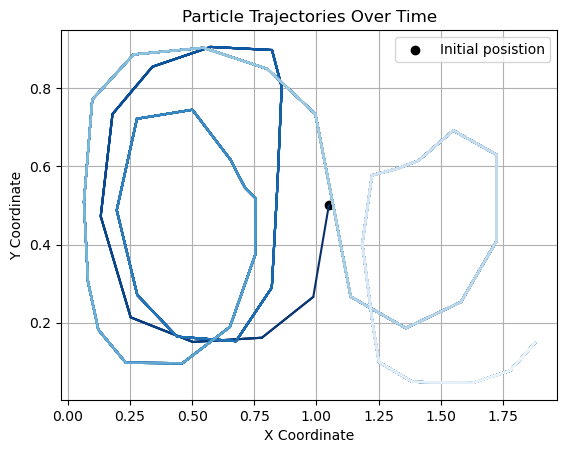

In [107]:
A = 0.1
epsilon = 0.25
w = 1
init_pos = [1.05, 0.5]
t = 50
h = 1
positions = Heun(init_pos, t, h, A, epsilon, w)
cmap = plt.get_cmap('Blues')
num_pos = positions.shape[0]
for particle_index in range(positions.shape[0]):
    x = positions[particle_index:, 0]  # Extract x coordinates for particle
    y = positions[particle_index:, 1]  # Extract y coordinates for particle
    plt.plot(x, y, color = cmap(1-(particle_index)/num_pos))
plt.scatter(init_pos[0], init_pos[1], label = "Initial posistion", color = "black")
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Particle Trajectories Over Time')
plt.legend()
plt.grid(True)
plt.show()


### b)

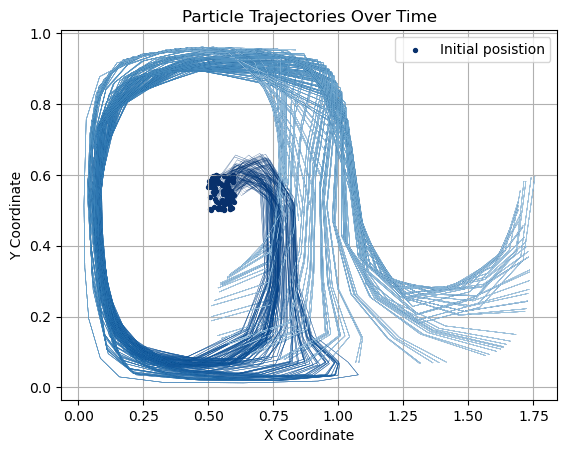

In [119]:
N_p = 100
t = 20
A = 0.1
epsilon = 0.25
w = 1
h = 1
x_cor = np.random.uniform(0.5, 0.6, 100) 
y_cor = np.random.uniform(0.5, 0.6, 100)
cmap = plt.get_cmap('Blues')
plt.scatter(x_cor, y_cor, label = "Initial posistion", color = cmap(1000), s = 8)
for i in range(N_p):
    positions = Heun([x_cor[i], y_cor[i]], t, h, A, epsilon, w)
    num_pos = positions.shape[0]
    for particle_index in range(positions.shape[0]):
        x = positions[particle_index:, 0]  # Extract x coordinates for particle
        y = positions[particle_index:, 1]  # Extract y coordinates for particle
        plt.plot(x, y, color = cmap(1-(particle_index)/num_pos), alpha= 0.3, lw = 0.3)

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Particle Trajectories Over Time')
plt.legend()
plt.grid(True)
plt.show()
